<a href="https://colab.research.google.com/github/Benvi0h/Machine_Learning_projects_Vikas/blob/main/Titanic_dataset_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c titanic


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("train.csv")
Test_data = pd.read_csv("test.csv")

label = 'Survived'
Features = df.columns
y = df[label]

In [ ]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['No_of_relatives'] = df['SibSp'] + df['Parch']


Test_data['Relatives'] = Test_data['SibSp'] + Test_data['Parch']
Test_data['No_of_relatives'] = Test_data['SibSp'] +Test_data['Parch']


df.loc[df['Relatives'] > 0,'Relatives'] = 1
Test_data.loc[Test_data['Relatives'] > 0,'Relatives'] = 1

Test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,No_of_relatives
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

X = df.drop(['Name','Ticket','PassengerId'],axis = 1)
X_test = Test_data.drop(['Name','Ticket','PassengerId'],axis = 1)

dummyX = X
dummyXt = X_test

for column in X.columns:
  X[column] = Encoder.fit_transform(dummyX[column])

for column in X_test.columns:
  X_test[column] = Encoder.fit_transform(dummyXt[column])

X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Relatives,No_of_relatives
0,2,1,44,0,0,24,76,1,0,0
1,2,0,60,1,0,5,76,2,1,1
2,1,1,74,0,0,41,76,1,0,0
3,2,1,34,0,0,34,76,2,0,0
4,2,0,27,1,1,46,76,2,1,2
...,...,...,...,...,...,...,...,...,...,...
413,2,1,79,0,0,31,76,2,0,0
414,0,0,51,0,0,154,22,0,0,0
415,2,1,50,0,0,9,76,2,0,0
416,2,1,79,0,0,31,76,2,0,0


In [ ]:
import seaborn

correlation = X.corr()
correlation. style. background_gradient (cmap = 'BrBG')

NameError: ignored

In [ ]:
Features = ['Pclass', 'Sex', 'Age', 'Cabin','Fare','Embarked','Relatives']
X = X[Features]
X_test = X_test[Features]

from sklearn import preprocessing,svm
X_scaled = preprocessing.scale(X)
X_test_scaled = preprocessing.scale(X_test)


X = pd.DataFrame(X_scaled, columns = X.columns)
X_test = pd.DataFrame(X_test_scaled,columns =X_test.columns)
X

,Pclass,Sex,Age,Cabin,Fare,Embarked,Relatives
0,0.827377,0.737695,-0.807422,0.451502,-1.247170,0.581114,1.231645
1,-1.566107,-1.355574,0.093656,-1.381627,1.451165,-1.938460,1.231645
2,0.827377,-1.355574,-0.572358,0.451502,-0.918801,0.581114,-0.811922
3,-1.566107,-1.355574,-0.063053,-2.103768,1.194181,0.581114,1.231645
4,0.827377,0.737695,-0.063053,0.451502,-0.890248,0.581114,-0.811922
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.533181,0.451502,-0.290618,0.581114,-0.811922
887,-1.566107,-1.355574,-0.964131,-2.798135,0.680212,0.581114,-0.811922
888,0.827377,-1.355574,1.543217,0.451502,0.366120,0.581114,1.231645
889,-1.566107,0.737695,-0.572358,-1.964895,0.680212,-1.938460,-0.811922


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# TrainX , TestX, TrainY, TestY = train_test_split(X,y,random_state = 1)
# X_train = X
# y_train = y

# Testing data
# Test_data = pd.read_csv('test.csv')

# dummyTd = Test_data
# for column in Test_data.columns:
#   Test_data[column] = Encoder.fit_transform(dummyTd[column])

# X_test = Test_data[Features]

model.fit(X,y)

LogisticRegression()

In [ ]:
accuracy = model.score(X,y)
accuracy

predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


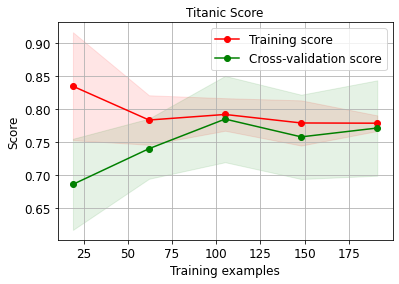

In [ ]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(LogisticRegression(), TestX, TestY,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Titanic Score");

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model_two = RandomForestClassifier()

# model_two.fit(TrainX, TrainY)

# accuracy = model_two.score(TestX,TestY)
# accuracy

In [ ]:
#Logistic Regression

cols = ['PassengerId','Survived']
submission = pd.DataFrame(Test_data['PassengerId'], columns = cols)

submission['Survived'] = predictions
submission

submission.to_csv('Prediction.csv', index = False)